# The Pyplot package

[Official Pyplot package documentation](https://matplotlib.org/stable/tutorials/introductory/pyplot.html)

***

Import all the necessary packages 

In [1]:
# For plotting
import matplotlib as mpl
from matplotlib import pyplot as plt, colors

# For numerical manipulation
import numpy as np

# for working with data tables
import pandas as pd

## Introduction

### What is Matplotlib?

Matplotlib is a multiplatform data visualization library for Python, originally created in 2003 as a patch for IPython for enabling interactive MATLAB-style plotting from the IPython command line [2]. 

It is built on NumPy arrays and designed to work with SciPy stack [2]. Its design philosophy is that it should be possible to create simple plots with just a few commands [1] but at the same time it allows for high degree of customization of parameters of created plots (colours, markers, line style etc, to name just few).

One of its strengths is compatibility with many different operating systems and graphics backends, ensuring correct operation regardless the users platform. This has led to wide adoption of this package by the large userbase which in turn led to large active developer base and the package popularity [2].

After being in use for nearly two decades, the interface and style of Matplotlib is showing it's age. It also predates Pandas for over a decade, so it's not designed to be used with Pandas ```DataFrames```. The answer to these weaknesses of Matplotlib is a Seaborn package. It provides a high-level interface on top of Matplotlib and offers large choices for plot styles and customization and defines high-level functions for common statistical plot types [2]. However, because Seaborn is built on top of Matplotlib, full customization of its plots require some knowledge of Matplotlib's concepts and interface [3]. Therefore, it's a good idea to learn how to use Matplotlib first before adopting Seaborn.

### How to install it?

Matplotlib package is not a part of Pythons Standard library, and therefore it must be installed before it can be used [4]. It can be installed using pip:

```
python -m pip install -U matplotlib
```

Matplotlib is also a part of the major Python distributions. If any of the following distributions are installed, there is no need to install Matplotlib separately as it's already included in the package [5]:
- Anaconda
- ActiveState ActivePython
- WinPython

### How to use it?

As with any other Python package that is not part of the Python Standard Library, first Matplotlib must be imported before it can be used in the application. Typically, ```plt``` is used as a shorthand for the ```matplotlib.pyplot``` interface and ```mpl``` for the ```matplotlib``` package [2][6]:

```python
import matplotlib as mpl
import matplotlib.pyplot as plt
```

The ```plt``` interface is what is used most often, although access to some of the plot parameters requires calling the  ```matplotlib``` directly.


Matplotlib is an object-oriented package and its principal objects are the Figure, the Axes and the Axis objects [6][7]:
- The Figure object is a canvas, on which all the other objects (Artists) are rendered (Axes, titles, legends etc).
- Axes are the objects attached to the Figure that contains a region for the plotting data and include 2 (or 3 for 3D plots) Axis objects
- Axis objects (e.g. X and Y axis) set the scale and limits and generate ticks (the marks on the Axis) and tick labels
- Artists are all the elements that are rendered on the figure. This can include Axes, Axis, Titles, Legend. All the items labelled blue on below figure are Artists.


<div>
<img src='https://matplotlib.org/stable/_images/anatomy.png' width="500"/>
</div>

#### State-based interface [7][8]

For simple plots it is possible to use only the ```pyplot``` interface. In this approach, various ```pyplot``` commands can be called in sequence and each command will modify some aspect of the same Figure object, without the need of user to explicitly create and call the Figure object instance. The state of the Figure instance is preserved after each ```pyplot``` function call, thus its name state-based interface.

An an ilustration for this approach, let's quickly plot a square function $y=x^2$:

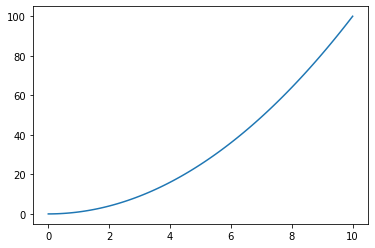

In [2]:
# initialize X and Y=X*X values
x = np.linspace(0, 10, 101) 
y = np.power(x, 2)


# let's plot the square function
plt.plot(x, y)     

# visualize the plot
plt.show()

The state-based interface is a no hassle method of creating simple plots quickly and it is well suited for in-process calculation validation, quick function visualisation etc. 

It is possible to plot more than one function on a single graph and customise the output by labelling the Axis, adding the legend or modifying the colour of the plotted lines. To ilustrate this, let's plot a square function with a green line and linear function with a red line on a single plot:

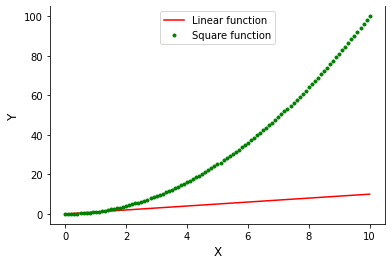

In [3]:
# initialize X and Y1 for linear function and Y2 values for the square function
x = np.linspace(0, 10, 101) 
y1 = x
y2 = np.power(x, 2)


# plot both function
plt.plot(x, y1, 'r-')         # use red line for linear function
plt.plot(x, y2, 'g.')         # use green dots for the square function

# Set the X axis label
plt.xlabel('X', fontsize=12)
# Set the Y axis label
plt.ylabel('Y', fontsize=12)

# Add the legend
plt.legend(['Linear function', 'Square function'], loc='upper center')

# Set the top Spine to invisible
# Access to Artists attached to the current active instance of Axes
# is possible using gca() - 'get current axes' method
plt.gca().spines['top'].set_visible(False)

# visualize the plot
plt.show()

As seen in the examples above, the state-based approach consists of series of ```plt``` interface functions calls and each changes one aspect of the active Figures state. It's very powerful in its simplicity as it lets the end user to create plots with just few commands and offers fair degree of customization.

This method has its limitation: as these functions are not called explicitly on the Figure/Axes instances, it is hard for the end user to read the code. What's more, modifying Artists attached to Axes/Figure requires calling ```gca()``` (get current Axes) or ```gcf()``` (get current Figure) methods and when there are more than one instances of Axes used, it's not as clear as calling these instances explicitly. Cue the object-oriented interface:

#### Object-oriented interface [7][8]

The Matplotlib is object oriented package. The state-based interface masks that fact to make the usage similar to MATLAB interface by putting the functional interface on the top. But in reality, what happens under the hood is that when the first ```plt``` function is called it creates hidden Figure and Axes objects instances. Their state is changed with each subsequent ```plt``` function call.

When working with an object-oriented interface, user explicitly creates instances of Figure and Axes objects and callst the appropriate functions on these instances. The most common way to create the pair of these objects instances is calling the ```subplots()``` function:
```python
fig, ax = plt.subplots()
```
- fig - an instance of the Figure object
- ax - an instance of the Axes object

Let's use this approach to recreate the plot above for linear $y=x$ and a square functions $y=x^2$:

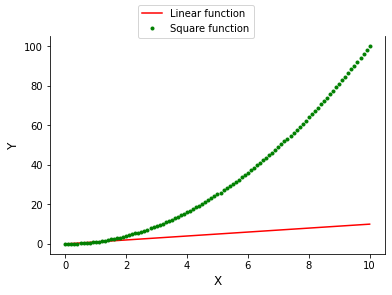

In [4]:
# initialize an instances of Figure and Axes objects
fig, ax = plt.subplots()

# Set the labels on the Axes instance
ax.set_xlabel('X', fontsize=12)
ax.set_ylabel('Y', fontsize=12)

# Plot the data onto the Axes instance
ax.plot(x, y1, 'r-')
ax.plot(x, y2, 'g.')

# Add the Legend Artist to the Figure instance
fig.legend(['Linear function', 'Square function'], loc='upper center')

# Set the top Spine in both Axes to invisible
# This is much cleaner way of accessing Spine objects comparing to the 
# State-based interface method: plt.gca().spines['top'].set_visible(False)
ax.spines['top'].set_visible(False)

# Show the plot
plt.show()

The above example yields the same results using both approches. The main difference is, that using object-oriented interface, ```plot()``` and ```set_xlabel(), set_ylabel()``` functions are called explicitly on the instance of the Axes object and the ```legend()``` function is explicitly called on the instance of Figure object. In the state-based interface, these functions are called from the ```plt``` interface which executes these functions on the active Figure or Axes instances which are obscured from the user. What's more, since we have an explicit access to the Axes instance ```spines['top'].set_visible(False)``` function can be called  directly on this instance and there is no need to call ```plt.gca()``` function to get the current active instance of Axes object like in the state based interface. This is much cleaner way of accessing the elements of the Axes, especially when working with more than one Axes instances in one Figure.

Object-oriented interface offers functionality that is not easily available through the state-based interface, for example using separate y-axis for plots of 2 different functions plotted on the same Figure:

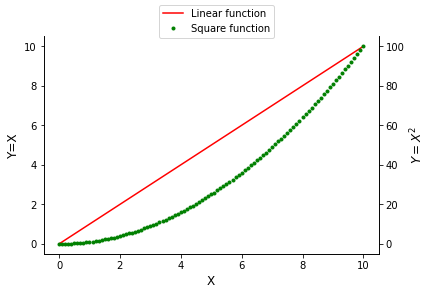

In [5]:
# initialize an instances of Figure and Axes objects
fig, ax1 = plt.subplots()

# Set the labels
ax1.set_xlabel('X', fontsize=12)
ax1.set_ylabel('Y=X', fontsize=12)
# Plot the data onto the Axes object
ax1.plot(x, y1, 'r-')

# create another Axes that share the x-axis
ax2 = ax1.twinx()
ax2.set_ylabel('$Y=X^2$', fontsize=12)
ax2.plot(x, y2, 'g.')

# Add the Legend Artist to the Figure object
fig.legend( ['Linear function', 'Square function'], loc='upper center')

# Set the top Spine in both Axes to invisible
# This is much cleaner way of accessing Spine objects comparing to the 
# State-based interface method: plt.gca().spines['top'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

# Show the plot
plt.show()

## Example plots

### Scatter plot

##### Why Scatter plot?

Scatter plot is one of the most useful plots used in data science. It allows us to visualise relationship between two variables (correlations) and asses the strength of these relationships. It can show patterns in the data. It is also possible to see the differences in distributions between different groups by plotting them in different colour (categorical third variable). It is also possible to add numerical third variable and represent it by either size of the marker or different colour [8].

##### Download Iris dataset to plot

In [6]:
# Iris dataset downloaded as per:
# https://www.angela1c.com/projects/iris_project/downloading-iris/

csv_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
# using the attribute information as the column names
col_names = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width','Class']
iris =  pd.read_csv(csv_url, names = col_names)

##### Add scatter plot of Sepal Length vs Sepal Width for each Iris class

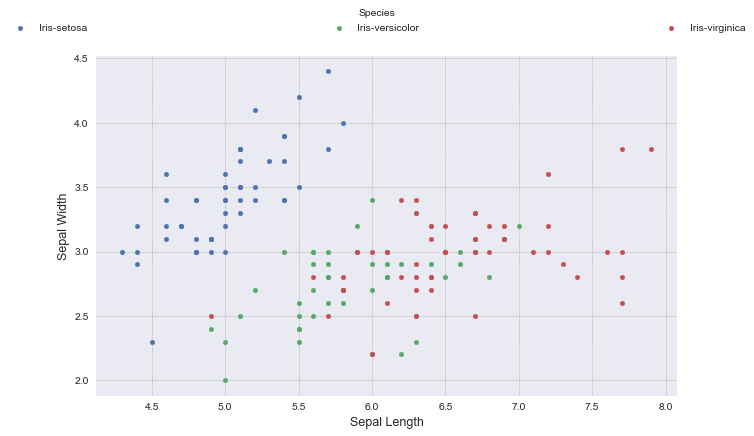

In [7]:
plt.style.use('seaborn')                        # Set the style of plotting to 'seaborn', all styles here: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html

fig, ax = plt.subplots(
    figsize=(10,6),                             # specify the size of the Figure
    dpi = 75                                    # specify resolution in dots per inch
)

# Iterate through classes in iris dataset
# This loop will result in adding 3 scatter plots to the 'ax' Axes, one for each iris Class
for c in iris['Class'].unique():
    ax.scatter(
        iris[iris['Class']==c]['Sepal_Length'], # X values 
        iris[iris['Class']==c]['Sepal_Width'],  # Y values
        label=c,                                # Use the class as a label
        marker=".",                             # Marker type, for list of possible values check: https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers
        s=80                                    # Marker size, default is plt.rcParams['lines.markersize'] ** 2
    )

# Set the labels on the Axis
ax.set_xlabel('Sepal Length', fontsize=12)
ax.set_ylabel('Sepal Width', fontsize=12)

# Add gridlines
ax.grid(which='major',                          # major, minor or both
        color='darkgrey',                       # Specify the color of gridlines 
        linestyle='--',                         # Specify style of the gridlines
        linewidth=0.5                           # 
       )

# Add legend to the Figure
fig.legend(
    title="Species",                            # Optional title for the legend
    loc='upper center',                         # Location of the legend
    mode='expand',                              # Mode of the legend: expand or none, if expand items in thelegend will be
    ncol=len(iris['Class'].unique())            # listed in the 'ncol' number of columns
    )

plt.show()

#### Use colour to represent continuous variable

##### Download and clean the NASA Exoplanets dataset

In [8]:
# Download a Planets Dataset from the Seaborn example data set repository (originated from the NASA Exoplanet)
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/planets.csv'
planets = pd.read_csv(url)

In [9]:
# Depending on the metheod of plantes discovery and other circumstances, some of the planets missing one ore more parameters
# I'm removing the rows that have missing values as this dataset is used only to demonstrate the use of a scatterplot and I'm not concern with actually analysing this dataset
planets.dropna(axis=0, inplace=True)
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


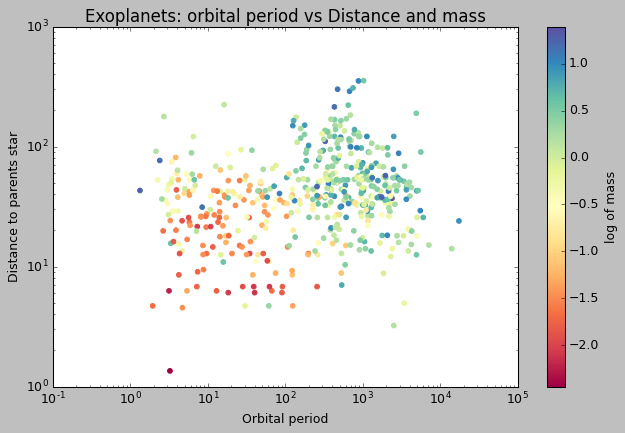

In [10]:
# Use classic plot style
mpl.style.use('classic')

# Created with help of this article:
# https://www.tutorialspoint.com/how-can-i-convert-numbers-to-a-color-scale-in-matplotlib
fig, ax = plt.subplots(
    figsize=(10,6),                             # specify the size of the Figure
    dpi = 75                                    # specify resolution in dots per inch
                      )


cmap = plt.cm.Spectral
norm = colors.Normalize(vmin=np.log10(planets.mass).min(), vmax=np.log10(planets.mass).max())


ax.scatter(
    planets.orbital_period,                     # Use planets orbital period as an X axis
    planets.distance,                           # Use planets distance to it's star as a Y axis
    color = cmap(norm( np.log10(planets.mass )))  # Use a base 10 logaritm of a mass as a color of a datapoint
)

# Set both Axis to logaritmic scale, as both the 'orbital period' and the 'distance' span several orders or magnitude
ax.set_xscale('log')
ax.set_yscale('log')

# Set the labels on the Axis
ax.set_xlabel('Orbital period', fontsize=12)
ax.set_ylabel('Distance to parents star', fontsize=12)


sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = fig.colorbar(sm)

# https://stackoverflow.com/questions/15908371/matplotlib-colorbars-and-its-text-labels
cbar.set_label('log of mass')

# Add a title for the whole Figure
# Add title to the Axes
ax.set_title('Exoplanets: orbital period vs Distance and mass', fontsize=16)

plt.show()

#### Use scatter plot to represent discrete variables

In [11]:
# Re-download a Planets Dataset from the Seaborn example data set repository (originated from the NASA Exoplanet)
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/planets.csv'
planets = pd.read_csv(url)

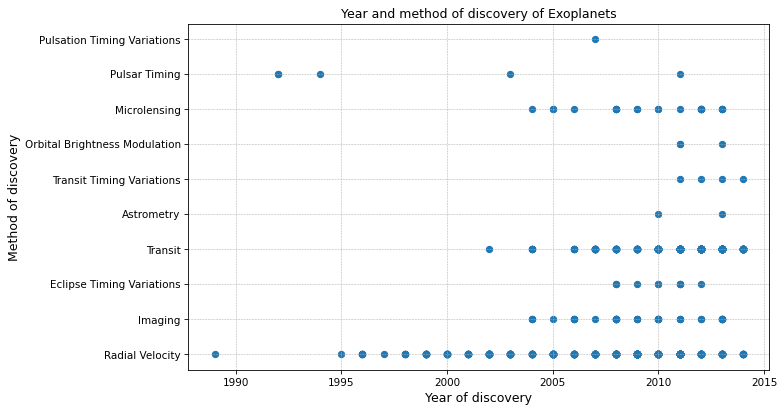

In [12]:
# Reset Matplot style back to default, as per:
# https://stackoverflow.com/questions/26413185/how-to-recover-matplotlib-defaults-after-setting-stylesheet
mpl.rcParams.update(mpl.rcParamsDefault)

fig, ax = plt.subplots(figsize=(10,6),                             # specify the size of the Figure
                       dpi = 75)

ax.scatter(planets.year, planets.method)                           # Use year and method of discovery as X and Y

# Set the labels on the Axis
ax.set_xlabel('Year of discovery', fontsize=12)
ax.set_ylabel('Method of discovery', fontsize=12)

# Show grid on both Axis, thin dashed line
ax.grid( linestyle = '--', linewidth = 0.5)

# Add title to the Axes
ax.set_title('Year and method of discovery of Exoplanets')

plt.show()

##### Calculate the number of discovered planets in each year using each method

The above scatter plot is missing one important information: it tells us nothing about how many planets were discovered in each year using each method. We’ll can represent it with a marker size, but we'll need to calculate it first:

In [13]:
# Add 'count' column filled with 1s
planets['count'] = 1

# Create 2D table with 'year' as a rows and 'methods' as a columns
# fill it with sum of 'count' column, every cell will hold a number of planets discovered that year with particular method
pivot = pd.pivot_table(planets, index='year', columns='method', values='count', aggfunc=np.sum)

# Create a list of methods, these will be needed in next step
methods = pivot.columns

# Add a 'year' column using the index
pivot['year'] = pivot.index

# Fill all the blank cell with 0s
pivot.fillna(0, inplace=True)

# see the tables top 5 rows:
pivot.head()

method,Astrometry,Eclipse Timing Variations,Imaging,Microlensing,Orbital Brightness Modulation,Pulsar Timing,Pulsation Timing Variations,Radial Velocity,Transit,Transit Timing Variations,year
year,,,,,,,,,,,
1989,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1989
1992,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1992
1994,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1994
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1995
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,1996


In [14]:
# Unpivot the pivot table, to create the following columns: 'year', 'method' and 'Count' - number of planets discoverd that year with that method
planet_discover_count = pd.melt(pivot, id_vars=['year'], value_vars = methods, var_name = 'Method', value_name = 'Count')

# remove the rows that have 'Count'=0
planet_discover_count = planet_discover_count[planet_discover_count['Count']>0]

#Show the firts 5 rows of the new table
planet_discover_count.head()

,year,Method,Count
18,2010,Astrometry,1.0
21,2013,Astrometry,1.0
39,2008,Eclipse Timing Variations,2.0
40,2009,Eclipse Timing Variations,1.0
41,2010,Eclipse Timing Variations,2.0


##### Plot Year of discovery vs discovery method with marker size representing number of discoveries

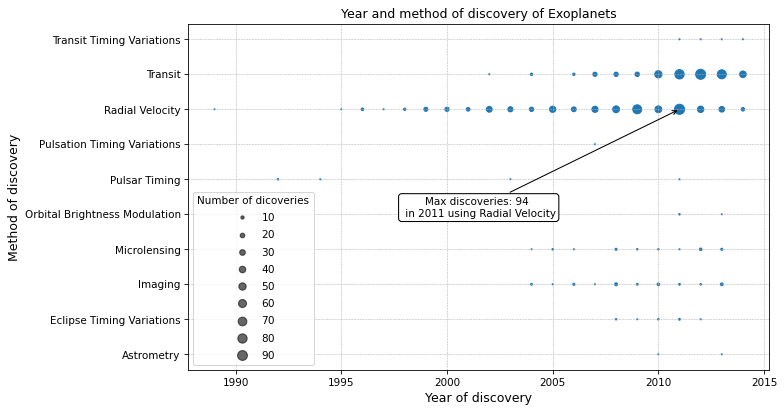

In [15]:
# Reset Matplotlib style back to default, as per:
# https://stackoverflow.com/questions/26413185/how-to-recover-matplotlib-defaults-after-setting-stylesheet
mpl.rcParams.update(mpl.rcParamsDefault)

fig, ax = plt.subplots(figsize=(10,6),                             # specify the size of the Figure
                       dpi = 75)

scatter = ax.scatter(planet_discover_count.year,                   # Use the year of discovery as X
                     planet_discover_count.Method,                 # use the method of discovery as Y
                     s=planet_discover_count.Count)                # Use number of discoveries as a marker size


# Set the labels on the Axis
ax.set_xlabel('Year of discovery', fontsize=12)
ax.set_ylabel('Method of discovery', fontsize=12)

# Show grid on both Axis, thin dashed line
ax.grid( linestyle = '--', linewidth = 0.5)

# Add the title to the Axes
ax.set_title('Year and method of discovery of Exoplanets')

# produce a legend with a cross section of sizes from the scatter
# from https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_with_legend.html
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)

legend2 = ax.legend(handles,                                       # list of Artists (patches) to be added to the legend
                    labels,                                        # list of labels to be added to the legend
                    loc="lower left",                              # location of the legend
                    title="Number of dicoveries")                  # The title of th elegend

# Find in which year, which method yielded the most discoveries
y_max, m_max, c_max = planet_discover_count.sort_values(by='Count', ascending=False).iloc[0,:]

# Annotations added as per:
# https://matplotlib.org/stable/tutorials/text/annotations.html
ax.annotate('Max discoveries: {0:2d} \n in {1} using {2}'.format(int(c_max), y_max, m_max),    # Text to be put in the annotation
            xy=(y_max, m_max),  xycoords='data',                                               # coordinates of the data point 
            xytext=(0.5, 0.5), textcoords= 'axes fraction',                                    # coordinates of the text
            arrowprops=dict(facecolor='black',  arrowstyle="->", connectionstyle="arc3"),      # parameters of the arrow
            horizontalalignment='center', verticalalignment='top',                             # alignment of the text to the 'xytext' coordinates
            bbox=dict(boxstyle="round", fc="w")                                                # parameters of the box around the text
            )

plt.show()

### Histogram

##### Why Histogram?

Histograms are as ubiquitous in the world of data science as scatter plots. They offer a quick insight into a general distribution of a dataset variables: they show where the peaks are, whether or not distribution is symmetrical, skewed or if there are any outliers. 

##### Absolute vs Relative frequency

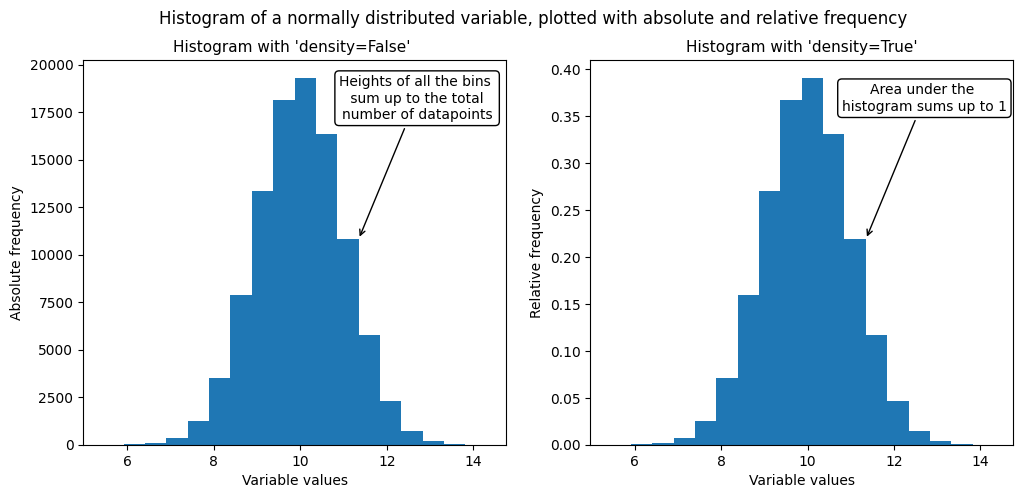

In [16]:
# Reset Matplotlib style back to default, as per:
# https://stackoverflow.com/questions/26413185/how-to-recover-matplotlib-defaults-after-setting-stylesheet
mpl.rcParams.update(mpl.rcParamsDefault)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))


fig.suptitle("Histogram of a normally distributed variable, plotted with absolute and relative frequency")

# Number of points
n=100000

# Random, normally distributed variable
x = np.random.normal(10,1,n)

# Calculate number of Histogram bins using Sturge’s Rule
# as per: https://www.statisticshowto.com/choose-bin-sizes-statistics/
n_bins = int(1 + np.round( 3.322 * np.log10(n) ))

# Add first Histogram

# create a histogram on the Axes
n, bins, patches = ax1.hist(x, n_bins, density=False)

# Ste the title for the first histogram
ax1.set_title('Histogram with \'density=False\' ', fontsize=11)

# Set the labels on the Axis
ax1.set_xlabel('Variable values', fontsize=10)
ax1.set_ylabel('Absolute frequency', fontsize=10)

ax1.annotate('Heights of all the bins \n sum up to the total \nnumber of datapoints',          # Text to be put in the annotation
            xy=(bins[-7], n[-7]),  xycoords='data',                                            # coordinates of the data point 
            xytext=(0.79, 0.9), textcoords= 'axes fraction',                                    # coordinates of the text
            arrowprops=dict(facecolor='black',  arrowstyle="->", connectionstyle="arc3"),      # parameters of the arrow
            horizontalalignment='center', verticalalignment='center',                          # alignment of the text to the 'xytext' coordinates
            bbox=dict(boxstyle="round", fc="w")                                                # parameters of the box around the text
            )

# Add the second Histogram

# create a histogram on the Axes
n, bins, patches = ax2.hist(x, n_bins, density=True)

# Set the title for the second Histogram
ax2.set_title('Histogram with \'density=True\'', fontsize=11)

# Set the labels on the Axis
ax2.set_xlabel('Variable values', fontsize=10)
ax2.set_ylabel('Relative frequency', fontsize=10)

ax2.annotate('Area under the \nhistogram sums up to 1',                                        # Text to be put in the annotation
            xy=(bins[-7], n[-7]),  xycoords='data',                                            # coordinates of the data point 
            xytext=(0.79, 0.9), textcoords= 'axes fraction',                                    # coordinates of the text
            arrowprops=dict(facecolor='black',  arrowstyle="->", connectionstyle="arc3"),      # parameters of the arrow
            horizontalalignment='center', verticalalignment='center',                          # alignment of the text to the 'xytext' coordinates
            bbox=dict(boxstyle="round", fc="w")                                                # parameters of the box around the text
            )

plt.show()

##### Plotting histogram for data with more than one class

[]

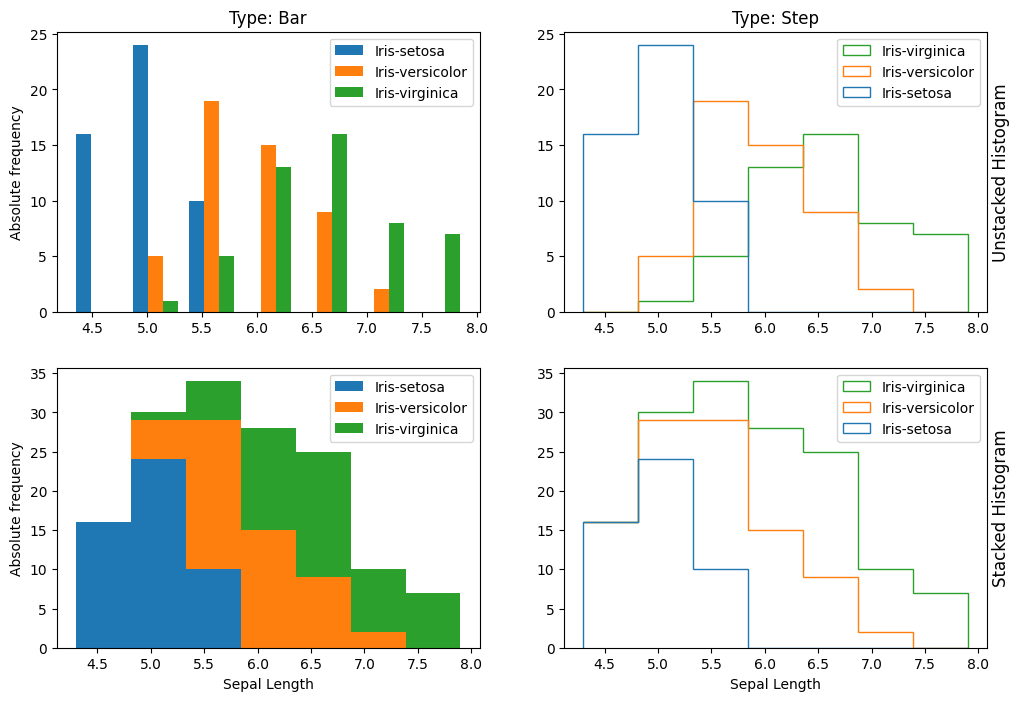

In [44]:
# Reset Matplotlib style back to default, as per:
# https://stackoverflow.com/questions/26413185/how-to-recover-matplotlib-defaults-after-setting-stylesheet
mpl.rcParams.update(mpl.rcParamsDefault)

# Iniitiate an instances of figure and Axes objects
fig, ((ax0, ax1), (ax2, ax3))  = plt.subplots(2, 2, figsize=(12,8))


#PREPARE THE DATA

# Create an empty sepal_l list
sepal_l=[]

# append the list of sepal_length for each Iris Class
for c in iris['Class'].unique():
    sepal_l.append( iris[iris['Class']==c]['Sepal_Length'].to_list())

# Calculate number of Histogram bins using Sturge’s Rule
# as per: https://www.statisticshowto.com/choose-bin-sizes-statistics/
# Use thelength of the first class as a number of datapoints
n_bins = int(1 + np.round( 3.322 * np.log10(len(sepal_l[0])) ))


# FIRST HISTOGRAM, TYPE: BAR, STACKED: FALSE

# Create a histogram using list of 3 sepal length lists, one for each class
# Use bar style histogram without stacking
n, bins, patches = ax0.hist(sepal_l, n_bins, label=iris['Class'].unique(), histtype='bar', stacked=False)

# Set the title
ax0.set_title("Type: Bar")

# Show the legend
ax0.legend(prop={'size': 10})

# Set the labels on the Axis
#ax0.set_xlabel('Sepal Length', fontsize=10)
ax0.set_ylabel('Absolute frequency', fontsize=10)


# SECOND HISTOGRAM, TYPE: STEP, STACKED: FALSE

# Create a histogram using list of 3 sepal length lists, one for each class
# Use bar style histogram without stacking
n, bins, patches = ax1.hist(sepal_l, n_bins, label=iris['Class'].unique(), histtype='step', stacked=False)

# Set the title
ax1.set_title("Type: Step")

# Show the legend
ax1.legend(prop={'size': 10})

# Set the labels on the Axis
ax1.yaxis.set_label_position("right")
ax1.set_ylabel('Unstacked Histogram', fontsize=12)


# THIRD HISTOGRAM, TYPE: BAR, STACKED: TRUE

# Create a histogram using list of 3 sepal length lists, one for each class
# Use bar style histogram without stacking
n, bins, patches = ax2.hist(sepal_l, n_bins, label=iris['Class'].unique(), histtype='bar', stacked=True)

# Set the title
#ax2.set_title("Type: Bar")

# Show the legend
ax2.legend(prop={'size': 10})

# Set the labels on the Axis
ax2.set_xlabel('Sepal Length', fontsize=10)
ax2.set_ylabel('Absolute frequency', fontsize=10)


# FOURTH HISTOGRAM, TYPE: STEP, STACKED: TRUE

# Create a histogram using list of 3 sepal length lists, one for each class
# Use bar style histogram without stacking
n, bins, patches = ax3.hist(sepal_l, n_bins, label=iris['Class'].unique(), histtype='step', stacked=True)

# Set the title
#ax3.set_title("Type: Step")

# Show the legend
ax3.legend(prop={'size': 10})

# Set the labels on the Axis
ax3.set_xlabel('Sepal Length', fontsize=10)
ax3.yaxis.set_label_position("right")
ax3.set_ylabel('Stacked Histogram', fontsize=12)

# show the plot
plt.plot()

In [18]:
# Only numeric columns selected from Iris df as per:
# https://stackoverflow.com/questions/25039626/how-do-i-find-numeric-columns-in-pandas
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
columns = iris.select_dtypes(include=numerics).columns
nr = len(columns)

##### Plot scatter plot for each combination of 'iris' column

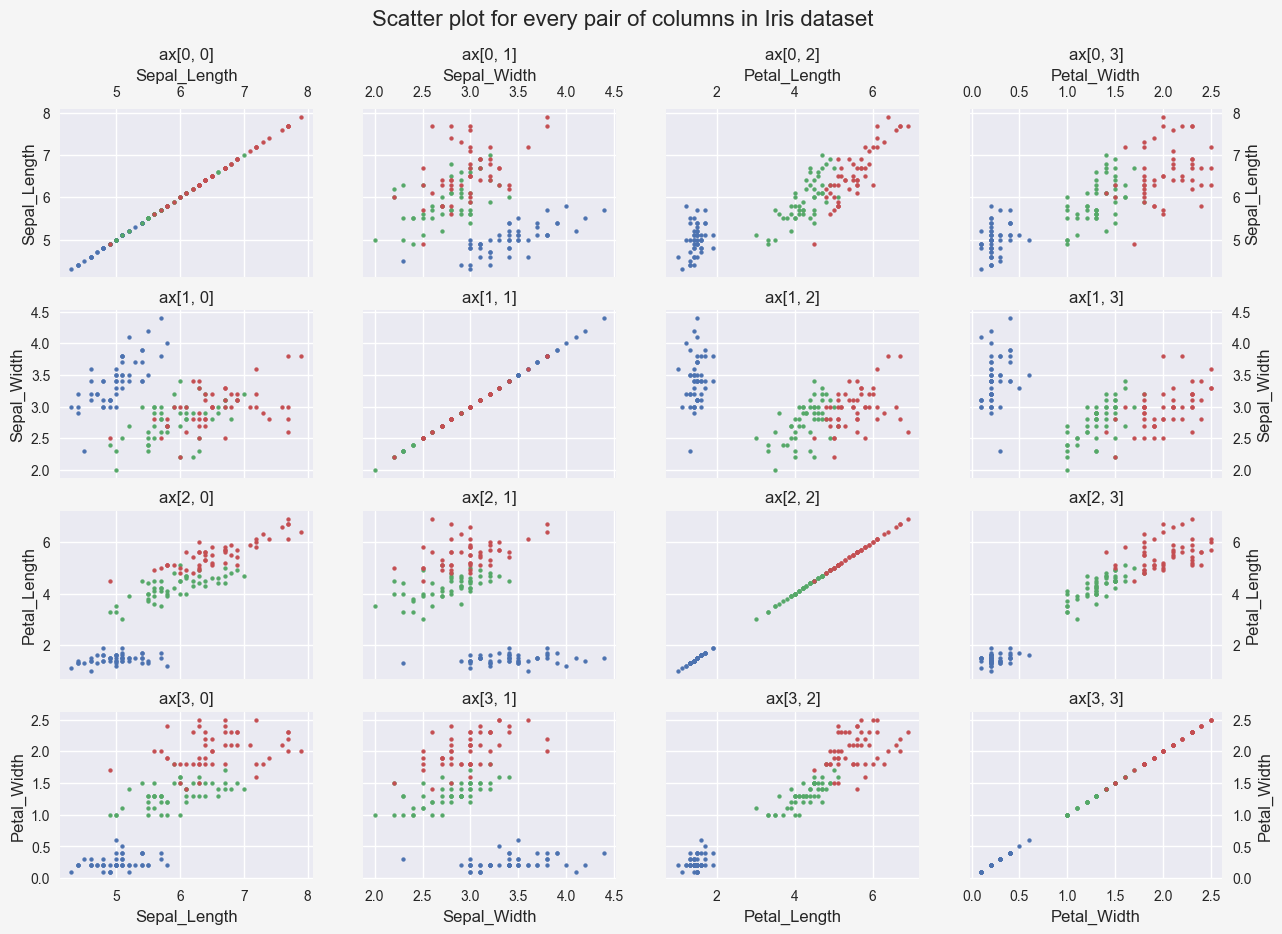

In [19]:
# Reset Matplot style back to default, as per:
# https://stackoverflow.com/questions/26413185/how-to-recover-matplotlib-defaults-after-setting-stylesheet
mpl.rcParams.update(mpl.rcParamsDefault)

mpl.style.use('seaborn')        # Set the style of plotting to 'seaborn', all styles here: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html

fig, ax = plt.subplots(nr,nr, figsize=(15,10))

cmap = plt.cm.tab10

# Set figures background colour
fig.patch.set_facecolor("whitesmoke")

# Add a title for the whole Figure
fig.suptitle('Scatter plot for every pair of columns in Iris dataset', fontsize=16)

# initiate Axes column counter
ix=0
# iterate through 'iris' tables columns for X scatter plot
for cx in columns:
    # initiate Axes row counter
    iy=0
    # iterate through 'iris' tables columns for Y scatter plot
    for cy in columns:
        # Iterate through classes in iris dataset
        # This loop will result in adding 3 scatter plots to the 'ax[iy, ix]' Axes, one for each iris Class
        for c in iris['Class'].unique():
            ax[iy, ix].scatter(
                iris[iris['Class']==c][cx],             # 'cx' column as X values 
                iris[iris['Class']==c][cy],             # 'cy' column as Y values
                label=c,                                # Use the class as a label
                marker=".",                             # Marker type, for list of possible values check: https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers
                s=30                                    # Marker size, default is plt.rcParams['lines.markersize'] ** 2
            )
            # Set title for each Axes, to show in which order Axes are displayed from the 4x4 array 
            ax[iy, ix].set_title("ax[{}, {}]".format(iy, ix))
            
            # Set the labels only at the bottom Axes:
            if iy==np.size(ax, 1) - 1:
                ax[iy, ix].set_xlabel(cx, fontsize=12)
            elif iy==0:
                # For the top most row, move X ticks and the label to the top
                ax[iy, ix].xaxis.tick_top()
                ax[iy, ix].xaxis.set_label_position("top")
                ax[iy, ix].set_xlabel(cx, fontsize=12)
            # Remove the x tick labels if the Axes are not the bottoms ones
            else:
                # Remove x ticks for the middle rows
                ax[iy, ix].set_xticklabels([])
                
            # Set the labels only at the most left Axes:                
            if ix==0:
                ax[iy, ix].set_ylabel(cy, fontsize=12)
            elif ix==np.size(ax, 0) - 1:
                # For the rifgt most column, move Y ticks and the labels to the Right
                ax[iy, ix].yaxis.tick_right()
                ax[iy, ix].yaxis.set_label_position("right")
                ax[iy, ix].set_ylabel(cy, fontsize=12)                
            # Remove the y tick labels if the Axes are not the most left ones
            else:
                ax[iy, ix].set_yticklabels([])
        iy+=1
    ix+=1

plt.show()

## References

[[1] https://matplotlib.org/cheatsheets/handout-beginner.pdf](https://matplotlib.org/cheatsheets/handout-beginner.pdf )</br>
[[2] Python Data Science Handbook, Jake VanderPlas, Chapter 4. Visualization with Matplotlib, O'Reilly](https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html )</br>
[[3] An introduction to seaborn](http://seaborn.pydata.org/introduction.html)</br>
[[4] The Python Standard Library](https://docs.python.org/3/library/)</br>
[[5] Matplotlib, Installation](https://matplotlib.org/stable/users/installing/index.html)</br>
[[6] Matplotlib, Basic Usage](https://matplotlib.org/stable/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py)</br>
[[7] Pyplot vs Object Oriented Interface](https://matplotlib.org/matplotblog/posts/pyplot-vs-object-oriented-interface/)</br>
[[8] Matplotlib and the Object-Oriented Interface](https://danielmuellerkomorowska.com/2020/07/05/matplotlib-and-the-object-oriented-interface/)</br>
[[9] A Complete Guide to Scatter Plots](https://chartio.com/learn/charts/what-is-a-scatter-plot/)</br>
[[10] A Complete Guide to Histograms](https://chartio.com/learn/charts/histogram-complete-guide/)</br>

# End